In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',200)
import numpy as np

In [5]:
df=pd.read_csv('dataset.csv',index_col=0)

### Rename columns

In [6]:
df = df.rename(columns={'LIMIT_BAL': 'limit_bal', 
                                        'SEX': 'sex', 
                                        'EDUCATION': 'education', 
                                        'MARRIAGE': 'marriage', 
                                        'AGE': 'age', 
                                        'PAY_0': 'pay_sept',
                                        'PAY_2': 'pay_aug',
                                        'PAY_3': 'pay_july',
                                        'PAY_4': 'pay_june',
                                        'PAY_5':'pay_may',
                                        'PAY_6':'pay_april',
                                        'BILL_AMT1':'bill_sept',
                                        'BILL_AMT2':'bill_aug',
                                        'BILL_AMT3':'bill_july',
                                        'BILL_AMT4':'bill_june',
                                        'BILL_AMT5':'bill_may',
                                        'BILL_AMT6':'bill_april',
                                        'PAY_AMT1':'pay_amt_sept',
                                        'PAY_AMT2':'pay_amt_aug',
                                        'PAY_AMT3':'pay_amt_july',
                                        'PAY_AMT4':'pay_amt_june',
                                        'PAY_AMT5':'pay_amt_may',
                                        'PAY_AMT6':'pay_amt_april',
                                        'default payment next month':'default',
                                        'marriage_2':'single',
                                        'marriage_3':'marriage_other',
                                        'edu_2':'edu_university',
                                        'edu_3':'edu_highschool',
                                        'edu_4':'edu_other'})

In [7]:
df.head()

limit_bal  sex  education  marriage  age  pay_sept  pay_aug  pay_july  \
0     200000    2          3         1   30         2        2         2   
1     200000    2          4         2   27        -2       -2        -2   
2      20000    2          2         2   28         0        0         2   
3      50000    1          2         2   23         0        0         0   
4      20000    1          2         1   47        -1       -1        -1   

   pay_june  pay_may  pay_april  bill_sept  bill_aug  bill_july  bill_june  \
0         2        2          2     140327    143137     145374     147273   
1        -2       -2         -2          0         0          0          0   
2         0        0          0       2937      5696       4144       8168   
3        -1        0          0      51274     50474      49724      48437   
4        -2       -2         -2        390       780          0          0   

   bill_may  bill_april  pay_amt_sept  pay_amt_aug  pay_amt_july  \
0    149244      151973          6600         6000          5860   
1         0           0             0            0             0   
2      6894       11424          3353            3          5101   
3     18712       19129          4175        41000         51705   
4         0           0           780            0             0   

   pay_amt_june  pay_amt_may  pay_amt_april  default  
0          6000         5000              0        0  
1             0            0              0        0  
2             6         6530           8103        1  
3           700          718            700        0  
4             0            0              0        0

In [8]:
df['marriage']=np.where(df['marriage']==0,3,df['marriage'])

In [9]:
df['marriage'].value_counts()

2    11942
1    10281
3      277
Name: marriage, dtype: int64

In [10]:
df['education']=np.where(df['education']==0,4,df['education'])
df['education']=np.where(df['education']==5,6,df['education'])
df['education']=np.where(df['education']==6,4,df['education'])


In [11]:
df['education'].value_counts()

2    10546
1     7921
3     3690
4      343
Name: education, dtype: int64

In [12]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_sept',
       'pay_aug', 'pay_july', 'pay_june', 'pay_may', 'pay_april', 'bill_sept',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'pay_amt_sept', 'pay_amt_aug', 'pay_amt_july', 'pay_amt_june',
       'pay_amt_may', 'pay_amt_april', 'default'],
      dtype='object')

In [13]:
df.drop(columns=['pay_sept','pay_aug','pay_june', 'pay_may', 'pay_april'],inplace=True)

In [14]:
df['pay_july']=np.where(df['pay_july']==-2,0,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==-1,0,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==2,1,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==3,1,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==4,1,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==5,1,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==6,1,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==7,1,df['pay_july'])
df['pay_july']=np.where(df['pay_july']==8,1,df['pay_july'])

In [15]:
df['pay_july'].value_counts()

0    19357
1     3143
Name: pay_july, dtype: int64

In [16]:
df.head(50)

limit_bal  sex  education  marriage  age  pay_july  bill_sept  bill_aug  \
0      200000    2          3         1   30         1     140327    143137   
1      200000    2          4         2   27         0          0         0   
2       20000    2          2         2   28         1       2937      5696   
3       50000    1          2         2   23         0      51274     50474   
4       20000    1          2         1   47         0        390       780   
5      400000    1          2         2   44         0       6902      7904   
6       70000    2          2         2   22         0       9232     68209   
7      170000    1          2         1   38         0     157174    139101   
8       20000    1          2         2   22         1      18743     19879   
9       60000    1          1         2   36         0     104492     53348   
10      80000    2          3         2   47         0     194843    197581   
11     180000    2          1         2   23         0       6825      4094   
12     210000    2          2         2   30         0     215842    220042   
13     330000    2          4         1   36         0      18768      3736   
14     100000    2          1         2   26         1       3144      2949   
15      40000    2          2         1   28         1      31131     33815   
16     390000    2          1         2   53         0        450      1540   
17     230000    2          3         2   30         0       1873      2778   
18     550000    2          1         2   28         0     257553    251236   
19      50000    1          3         1   45         0      29287     29875   
20      80000    2          3         2   27         0      54184     24393   
21      50000    2          3         2   50         1      47405     50138   
22      50000    2          3         1   40         0      31297     30175   
23     300000    2          2         1   40         0      11704     10196   
24     150000    2          1         1   43         0        885      -123   
25      50000    2          3         2   22         0      46687     47831   
26     230000    2          1         2   27         0      11406     10097   
27      20000    1          1         2   23         0      14697     11983   
28     140000    1          1         1   40         0     123049    125616   
29      50000    2          1         2   22         1      42611     41632   
30     450000    1          1         1   38         0      10591      7923   
31     350000    2          1         2   39         0       3860       648   
32      50000    2          1         2   26         0       1156       316   
33     200000    1          1         1   43         1     142291    152679   
34     210000    1          1         1   40         1     130868    138909   
35     110000    2          1         1   42         0      47021     48235   
36     130000    2          1         2   30         0       1493      1492   
37      70000    2          2         2   24         0       7033      1602   
38      80000    2          3         1   26         0       6808      8686   
39     140000    1          2         2   27         0      80210     67746   
40     310000    2          3         1   53         0       1126      2603   
41     180000    2          1         2   37         0      34607     43623   
42     100000    2          1         2   29         0      87791     85548   
43     280000    1          1         2   41         0       5819     14656   
44      20000    2          2         2   24         0          0         0   
45      50000    1          3         1   51         0      44147     45063   
46      10000    1          2         2   38         0       7955      7976   
47      30000    1          3         2   46         0      13784     13277   
48      20000    2          3         1   33         0          0         0   
49     120000    2          3         1   27         0

In [17]:
df2=df[['bill_sept','bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april']]

In [18]:
df2['bill_avg']=df2.mean(axis=1)

/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_bill_avg=pd.DataFrame(df2['bill_avg'])

In [20]:
df_bill_avg

bill_avg
0      146221.333333
1           0.000000
2        6543.833333
3       39625.000000
4         195.000000
...              ...
22495   18788.500000
22496   38717.333333
22497   49479.166667
22498  123250.333333
22499     966.166667

[22500 rows x 1 columns]

In [21]:
df=pd.concat([df,df_bill_avg],axis=1)

In [22]:
df.drop(columns=['bill_sept','bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april'],inplace=True)

In [23]:
df.head()

limit_bal  sex  education  marriage  age  pay_july  pay_amt_sept  \
0     200000    2          3         1   30         1          6600   
1     200000    2          4         2   27         0             0   
2      20000    2          2         2   28         1          3353   
3      50000    1          2         2   23         0          4175   
4      20000    1          2         1   47         0           780   

   pay_amt_aug  pay_amt_july  pay_amt_june  pay_amt_may  pay_amt_april  \
0         6000          5860          6000         5000              0   
1            0             0             0            0              0   
2            3          5101             6         6530           8103   
3        41000         51705           700          718            700   
4            0             0             0            0              0   

   default       bill_avg  
0        0  146221.333333  
1        0       0.000000  
2        1    6543.833333  
3        0   39625.000000  
4        0     195.000000

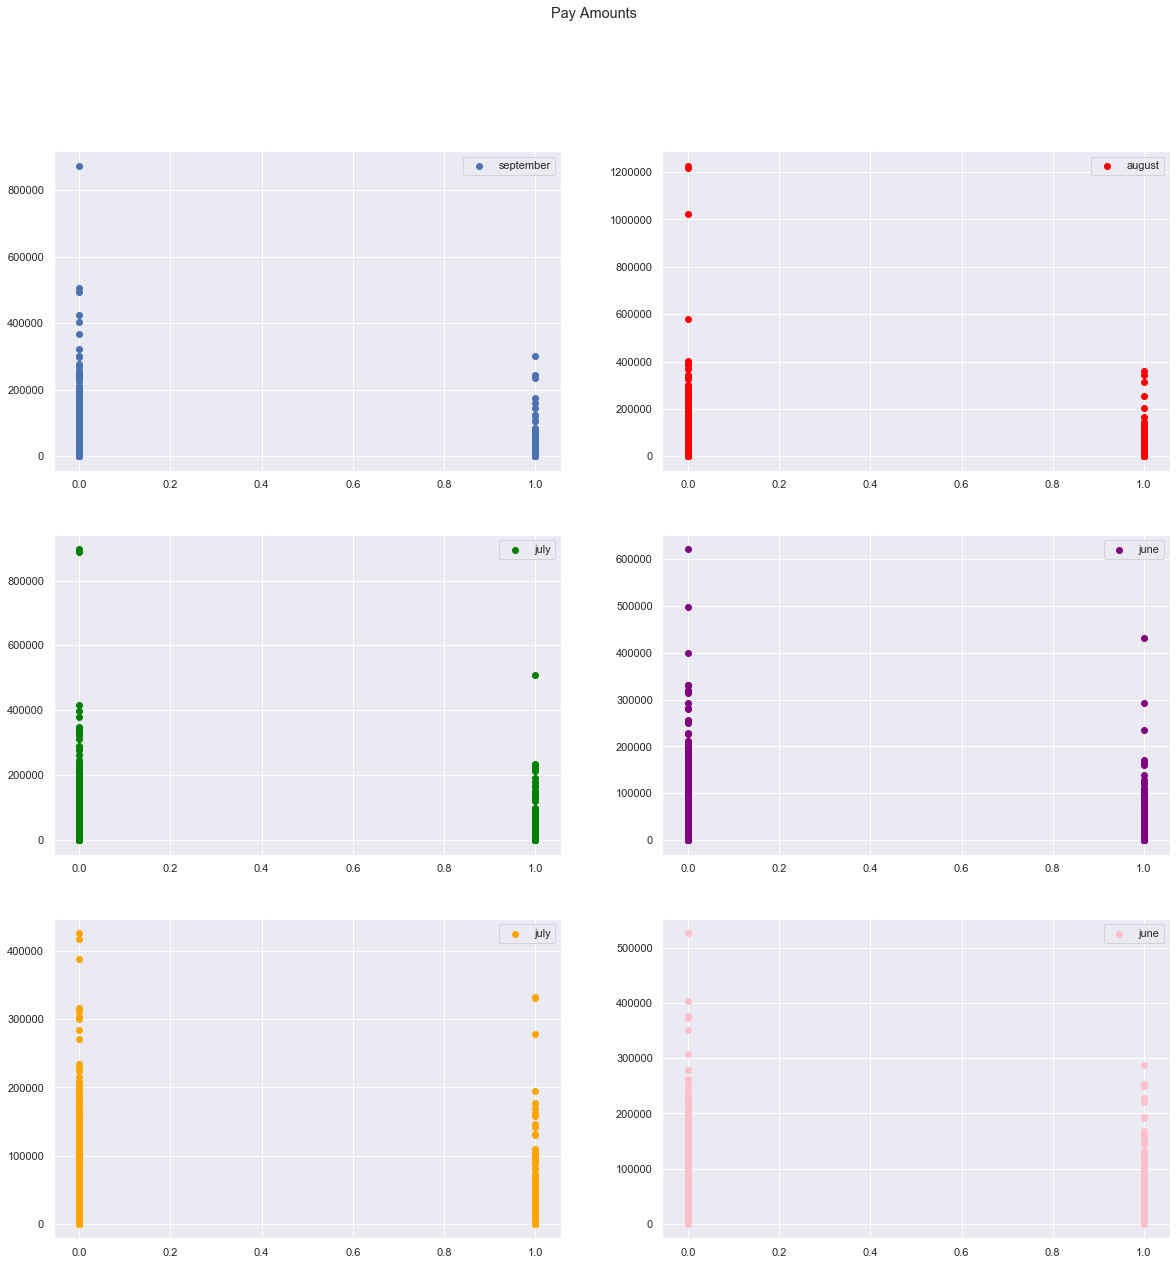

In [24]:
import seaborn as sns
sns.set()

plt.figure(1, figsize=(20,20))
plt.suptitle('Pay Amounts')
plt.subplot(321)
plt.scatter(df.default, df.pay_amt_sept, label='september')
plt.legend()
plt.subplot(322)
plt.scatter(df.default, df.pay_amt_aug, c='red', label='august')
plt.legend()
plt.subplot(323)
plt.scatter(df.default, df.pay_amt_july, c='green', label='july')
plt.legend()
plt.subplot(324)
plt.scatter(df.default, df.pay_amt_june, c='purple', label='june')
plt.legend()
plt.subplot(325)
plt.scatter(df.default, df.pay_amt_may, c='orange', label='july')
plt.legend()
plt.subplot(326)
plt.scatter(df.default, df.pay_amt_april, c='pink', label='june')
plt.legend()
plt.show()

In [25]:
df['pay_amt_sept_cap']=np.where((df['default'] == 1) & (df['pay_amt_sept'] > 200000),200000,df['pay_amt_sept'])
df['pay_amt_aug_cap']=np.where((df['default'] == 1) & (df['pay_amt_aug'] > 200000),200000,df['pay_amt_aug'])
df['pay_amt_july_cap']=np.where((df['default'] == 1) & (df['pay_amt_july'] > 200000),200000,df['pay_amt_july'])
df['pay_amt_june_cap']=np.where((df['default'] == 1) & (df['pay_amt_june'] > 200000),200000,df['pay_amt_june'])
df['pay_amt_may_cap']=np.where((df['default'] == 1) & (df['pay_amt_may'] > 200000),200000,df['pay_amt_may'])
df['pay_amt_april_cap']=np.where((df['default'] == 1) & (df['pay_amt_april'] > 200000),200000,df['pay_amt_april'])

In [26]:
df.head()

limit_bal  sex  education  marriage  age  pay_july  pay_amt_sept  \
0     200000    2          3         1   30         1          6600   
1     200000    2          4         2   27         0             0   
2      20000    2          2         2   28         1          3353   
3      50000    1          2         2   23         0          4175   
4      20000    1          2         1   47         0           780   

   pay_amt_aug  pay_amt_july  pay_amt_june  pay_amt_may  pay_amt_april  \
0         6000          5860          6000         5000              0   
1            0             0             0            0              0   
2            3          5101             6         6530           8103   
3        41000         51705           700          718            700   
4            0             0             0            0              0   

   default       bill_avg  pay_amt_sept_cap  pay_amt_aug_cap  \
0        0  146221.333333              6600             6000   
1        0       0.000000                 0                0   
2        1    6543.833333              3353                3   
3        0   39625.000000              4175            41000   
4        0     195.000000               780                0   

   pay_amt_july_cap  pay_amt_june_cap  pay_amt_may_cap  pay_amt_april_cap  
0              5860              6000             5000                  0  
1                 0                 0                0                  0  
2              5101                 6             6530               8103  
3             51705               700              718                700  
4                 0                 0                0                  0

In [27]:
marriage_dummy = pd.get_dummies(df['marriage'],prefix = 'marriage', drop_first=True)
df = pd.concat([df, marriage_dummy], axis = 1)

In [28]:
education_dummy = pd.get_dummies(df['education'],prefix = 'edu', drop_first=True)
df = pd.concat([df, education_dummy], axis = 1)

In [29]:
df.drop(columns=['education','marriage'],inplace=True)

In [30]:
df

limit_bal  sex  age  pay_july  pay_amt_sept  pay_amt_aug  pay_amt_july  \
0         200000    2   30         1          6600         6000          5860   
1         200000    2   27         0             0            0             0   
2          20000    2   28         1          3353            3          5101   
3          50000    1   23         0          4175        41000         51705   
4          20000    1   47         0           780            0             0   
...          ...  ...  ...       ...           ...          ...           ...   
22495      50000    2   50         0          2000         1306          1206   
22496      80000    2   53         0          2530         3990           850   
22497      50000    2   50         0          2070         2357          1746   
22498     220000    1   32         0          3746         3820          4000   
22499     130000    1   39         0           390          390          1068   

       pay_amt_june  pay_amt_may  pay_amt_april  default       bill_avg  \
0              6000         5000              0        0  146221.333333   
1                 0            0              0        0       0.000000   
2                 6         6530           8103        1    6543.833333   
3               700          718            700        0   39625.000000   
4                 0            0              0        0     195.000000   
...             ...          ...            ...      ...            ...   
22495          1000          697            532        0   18788.500000   
22496           800         1100           1100        0   38717.333333   
22497          1628         1520           2202        0   49479.166667   
22498          4000         4000           4500        0  123250.333333   
22499          3169          390            390        0     966.166667   

       pay_amt_sept_cap  pay_amt_aug_cap  pay_amt_july_cap  pay_amt_june_cap  \
0                  6600             6000              5860              6000   
1                     0                0                 0                 0   
2                  3353                3              5101                 6   
3                  4175            41000             51705               700   
4                   780                0                 0                 0   
...                 ...              ...               ...               ...   
22495              2000             1306              1206              1000   
22496              2530             3990               850               800   
22497              2070             2357              1746              1628   
22498              3746             3820              4000              4000   
22499               390              390              1068              3169   

       pay_amt_may_cap  pay_amt_april_cap  marriage_2  marriage_3  edu_2  \
0                 5000                  0           0           0      0   
1                    0                  0           1           0      0   
2                 6530               8103           1           0      1   
3                  718                700           1           0      1   
4                    0                  0           0           0      1   
...                ...                ...         ...         ...    ...   
22495              697                532           0           0      1   
22496             1100               1100           0           0      1   
22497             1520               2202           0           0      1   
22498             4000               4500           0           0      1   
22499              390                390           0           0      0   

       edu_3  edu_4  
0          1      0  
1          0      1  
2          0      0  
3          0      0  
4          0      0  
...      ...    ...  
22495      0      0  
22496      0      0  
22497      0      0  
22498      0      0  
22499      0     

---

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr_clf = LogisticRegression(solver='lbfgs')

lr_clf.fit(X_train, y_train)

y_pred_test = lr_clf.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_test))

/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy score:  0.7784888888888889
Test F1 score:  0.006379585326953748


/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
results = {}

results['baseline'] = (accuracy_score(y_test, y_pred_test), f1_score(y_test, y_pred_test))

In [71]:
from sklearn.feature_selection import RFECV

#recursive wrapper method

# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=lr_clf, step=1, cv=5, scoring='f1', verbose =1, n_jobs=-1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 22 features.


/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=-1, scoring='f1', step=1, verbose=1)

In [72]:
selected_columns = X_train.columns[selector.support_]
removed_columns = X_train.columns[~selector.support_]

In [73]:
selected_columns


Index(['limit_bal', 'sex', 'age', 'pay_july', 'pay_amt_sept', 'pay_amt_aug',
       'pay_amt_july', 'pay_amt_june', 'pay_amt_may', 'pay_amt_april',
       'pay_amt_sept_cap', 'pay_amt_aug_cap', 'pay_amt_july_cap',
       'pay_amt_june_cap', 'pay_amt_may_cap', 'pay_amt_april_cap',
       'marriage_2', 'marriage_3', 'edu_2', 'edu_3', 'edu_4'],
      dtype='object')

In [74]:
removed_columns

Index(['bill_avg'], dtype='object')

---

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

removed_lr_clf = LogisticRegression(class_weight='balanced', solver='lbfgs')

removed_lr_clf.fit(X_train[selected_columns], y_train)

removed_y_pred_test = removed_lr_clf.predict(X_test[selected_columns])


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, removed_y_pred_test))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, removed_y_pred_test))

Test Accuracy score:  0.5537777777777778
Test F1 score:  0.4063386944181646


/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### KNN

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)  
scaled_X_test = scaler.transform(X_test)  

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1, class_weight='balanced')
knn.fit(scaled_X_train, y_train)
knn_y_pred_class = knn.predict(scaled_X_test)

TypeError: __init__() got an unexpected keyword argument 'class_weight'

In [119]:
print('Test F1 score: ', f1_score(y_test, knn_y_pred_class))

Test F1 score:  0.3056546102903719


### GridsearchCV

In [79]:
from sklearn.model_selection import GridSearchCV

In [108]:
neighbors=list(range(1,15,2))
# algos=['kd_tree','brute']
metrics=['minkowski','manhattan','euclidean']
weights=['uniform','distance'] 

In [109]:
param_grid_knn = dict(n_neighbors=neighbors,metric=metrics)

In [110]:
gridknn=GridSearchCV(knn,param_grid_knn,cv=3,verbose=1,scoring='f1')

In [111]:
gridknn.fit(scaled_X_train, y_train)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_

/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/mode

/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/mode

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [112]:
# examine the best model
print(gridknn.best_score_)
print(gridknn.best_params_)
print(gridknn.best_estimator_)

0.3208520597785016
{'metric': 'manhattan', 'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


In [114]:
grid_knn_y_pred = gridknn.best_estimator_.predict(scaled_X_test)

# Model Accuracy, how often is the classifier correct?
print("F1:", f1_score(y_test, grid_knn_y_pred))

F1: 0.3099666189794945


### Train / Test / Split

In [45]:
from sklearn.model_selection import train_test_split

y = df[['default']]
X = df.drop(['default'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

### Fit model

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Get Coefficients
**Interpretation:** Having a high/low ____ value is associated with a ____ unit increase/decrease in the log-odds of 'defaults' (as compared to a non-defaults).

In [47]:
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))

In [48]:
dictionary

{'limit_bal': -3.6689775722024035e-06,
 'sex': -0.0006942469241972927,
 'age': -0.012792378098027283,
 'pay_july': 0.00020942307769197864,
 'pay_amt_sept': 0.045133638008533664,
 'pay_amt_aug': 0.0828574923151045,
 'pay_amt_july': 0.08681778506140267,
 'pay_amt_june': 0.06546201817250971,
 'pay_amt_may': 0.08126581318561632,
 'pay_amt_april': 0.05076326440865582,
 'bill_avg': 3.362079757520341e-06,
 'pay_amt_sept_cap': -0.04515014592220555,
 'pay_amt_aug_cap': -0.08288092182747855,
 'pay_amt_july_cap': -0.08682546566379931,
 'pay_amt_june_cap': -0.0654658549548,
 'pay_amt_may_cap': -0.0812829495184823,
 'pay_amt_april_cap': -0.050773233482001336,
 'marriage_2': -0.00031524032548800997,
 'marriage_3': -1.0719690016203426e-05,
 'edu_2': -0.00020261826653987104,
 'edu_3': -8.86483699676189e-05,
 'edu_4': -2.3045562645095025e-05}

### Create Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
classes = ['No Default', 'Default']

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[4375    0]
 [1246    4]]


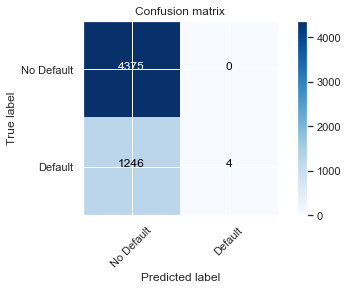

In [53]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

---

### Calculating F1 Score

In [49]:
y_pred = logreg.predict(X_test)

In [55]:
print("Accuracy:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.006379585326953748
